In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns
import matplotlib as plt

In [4]:
customer = pd.read_csv("Customer_ID.csv")
transactions = pd.read_csv("Transaction_ID.csv")

In [5]:
customer.drop(columns=["Gender","Income (USD/Month)"], axis = 1 , inplace= True)

In [6]:
print(customer.head())

   Customer ID  Age
0        29290   28
1        27703   27
2        28712   53
3        28020   23
4        27182   33


In [7]:
transactions.drop(columns= "Payment_Mode", axis = 1 , inplace= True)

In [8]:
print(transactions.head())

   Transaction ID  Customer ID
0        10000011        29290
1        10000012        27703
2        10000013        28712
3        10000014        28020
4        10000015        27182


In [9]:
cus_trnas_merge = pd.merge(transactions, customer, on = "Customer ID" , how= "inner")

In [10]:
print(cus_trnas_merge.head())

   Transaction ID  Customer ID  Age
0        10000011        29290   28
1        10351127        29290   28
2        10412921        29290   28
3        10000012        27703   27
4        10320494        27703   27


In [11]:
cab_data = pd.read_csv("Cab_Data.csv")
print(cab_data.head())

   Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776  


In [12]:
merged_df_h = pd.merge(cab_data , cus_trnas_merge , on = "Transaction ID", how= "inner")
print(merged_df_h.head())

   Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  Customer ID  Age  
0         370.95       313.635        29290   28  
1         358.52       334.854        27703   27  
2         125.20        97.632        28712   53  
3         377.40       351.602        28020   23  
4         114.62        97.776        27182   33  


In [13]:
company = merged_df_h["Company"].values
income = merged_df_h["Price Charged"].values
unique_companies  = np.unique(company)

total_income = {curcomp: income[curcomp == company].sum() for curcomp in unique_companies}

print(total_income)

{'Pink Cab': 26328251.330000002, 'Yellow Cab': 125853887.18999997}


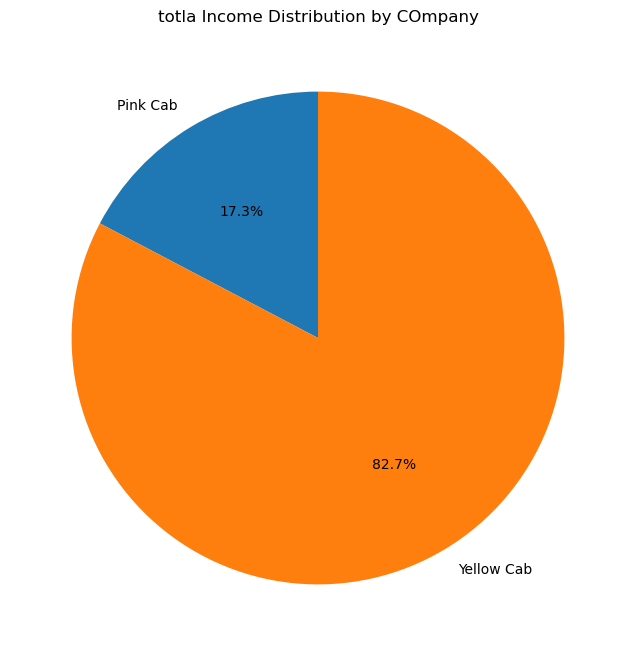

In [14]:
import matplotlib.pyplot as pt

income_df = pd.DataFrame.from_dict(total_income, orient='index', columns=['Total Income'])
income_df.reset_index(inplace=True)
income_df.rename(columns={'index':'Company'}, inplace=True)


pt.figure(figsize=(8,8))
pt.pie(income_df['Total Income'], labels = income_df['Company'], autopct = '%1.1f%%', startangle = 90)
pt.title("totla Income Distribution by COmpany")
pt.show()

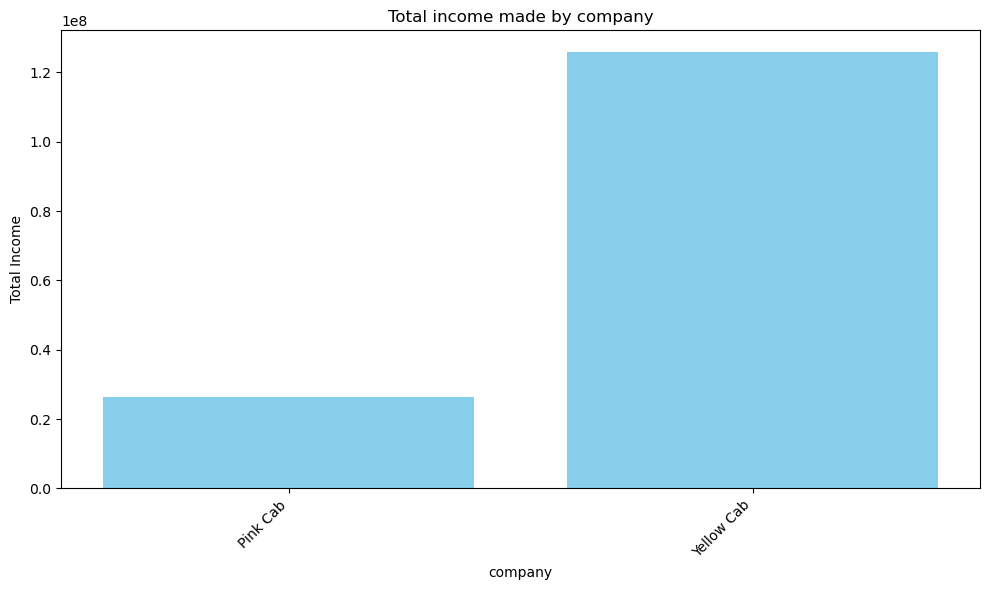

In [15]:
pt.figure(figsize=(10,6))
pt.bar(income_df['Company'], income_df['Total Income'], color='skyblue')
pt.title("Total income made by company")
pt.xlabel("company")
pt.ylabel("Total Income")
pt.xticks(rotation = 45, ha = 'right')
pt.tight_layout()
pt.show()

In [16]:
merged_df_h.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,28
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,27
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,53
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,23
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,33


In [17]:
from datetime import datetime, timedelta


In [18]:
base_date = datetime(1990,1,1)
merged_df_h['Date of Travel'] = merged_df_h['Date of Travel'].apply(lambda x: base_date + timedelta(days=x - 2))

merged_df_h.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age
0,10000011,2106-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,28
1,10000012,2106-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,27
2,10000013,2106-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,53
3,10000014,2106-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,23
4,10000015,2106-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,33


In [19]:
merged_df_h['Age Group'] = pd.qcut(merged_df_h['Age'], q=3, labels=['Q1', 'Q2', 'Q3'])

In [20]:
merged_df_h.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Age Group
0,10000011,2106-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,28,Q1
1,10000012,2106-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,27,Q1
2,10000013,2106-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,53,Q3
3,10000014,2106-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,23,Q1
4,10000015,2106-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,33,Q2


In [21]:
merged_df_h.drop(columns="Age Group", axis= 1, inplace=True)

merged_df_h['Age Group'] = pd.qcut(merged_df_h['Age'], q=4)

bin_edges = merged_df_h['Age Group'].cat.categories


age_group_labels = [f"{bin_edges[i].left}-{bin_edges[i].right}" for i in range(len(bin_edges))]


merged_df_h['Age Group'] = merged_df_h['Age Group'].cat.rename_categories(age_group_labels)

merged_df_h.head()


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Age Group
0,10000011,2106-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,28,25.0-33.0
1,10000012,2106-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,27,25.0-33.0
2,10000013,2106-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,53,42.0-65.0
3,10000014,2106-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,23,17.999-25.0
4,10000015,2106-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,33,25.0-33.0


C:\Users\nwosu\AppData\Local\Temp\ipykernel_1216\1833648621.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts = merged_df_h.groupby(['Company', 'Age Group']).size().reset_index(name='UserCount')
c:\Users\nwosu\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\nwosu\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=

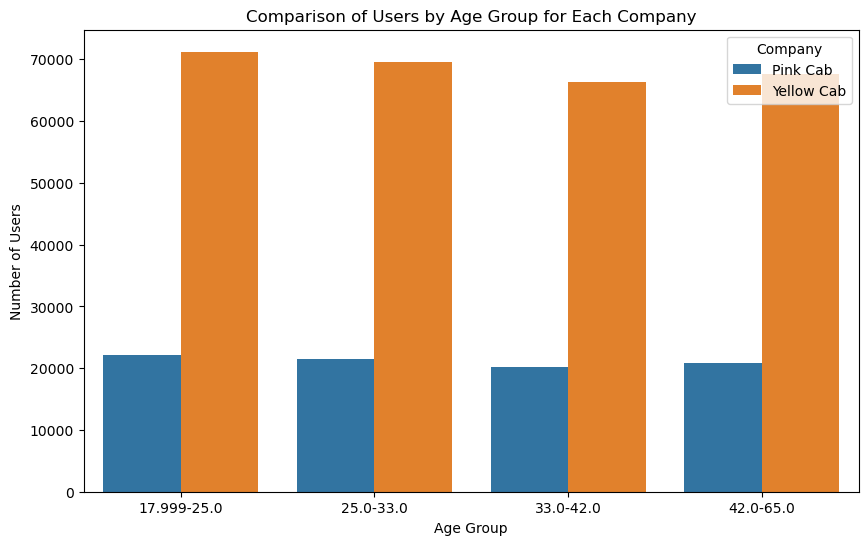

In [22]:
age_group_counts = merged_df_h.groupby(['Company', 'Age Group']).size().reset_index(name='UserCount')

pt.figure(figsize=(10,6))
sns.barplot(data=age_group_counts, x='Age Group', y='UserCount', hue='Company')

# Add title and labels
pt.title('Comparison of Users by Age Group for Each Company')
pt.xlabel('Age Group')
pt.ylabel('Number of Users')

# Show the plot
pt.show()


In [23]:
merged_df_h.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Age Group
0,10000011,2106-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,28,25.0-33.0
1,10000012,2106-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,27,25.0-33.0
2,10000013,2106-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,53,42.0-65.0
3,10000014,2106-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,23,17.999-25.0
4,10000015,2106-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,33,25.0-33.0


In [24]:
merged_df_h.tail()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Age Group
359387,10440101,2108-01-09,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,24,17.999-25.0
359388,10440104,2108-01-05,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,32,25.0-33.0
359389,10440105,2108-01-06,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,56,42.0-65.0
359390,10440106,2108-01-06,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,32,25.0-33.0
359391,10440107,2108-01-03,Yellow Cab,WASHINGTON DC,12.76,191.58,177.6192,52917,20,17.999-25.0


In [25]:

merged_df_h['Date of Travel'] = merged_df_h['Date of Travel'] - pd.DateOffset(years=90)



merged_df_h['Date of Travel'] = pd.to_datetime(merged_df_h['Date of Travel'])
bins = pd.to_datetime(['2016-01-01', '2017-01-01', '2018-01-01', '2018-12-12'])

merged_df_h['Date Groups'] = pd.cut(merged_df_h['Date of Travel'],
                                    bins=bins,
                                    right=False,
                                    include_lowest=True,
                                    labels=["2016","2017","2018"])

merged_df_h.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Age Group,Date Groups
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,28,25.0-33.0,2016
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,27,25.0-33.0,2016
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,53,42.0-65.0,2016
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,23,17.999-25.0,2016
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,33,25.0-33.0,2016


In [26]:
merged_df_h['profit per trip'] = merged_df_h['Price Charged'] - merged_df_h['Cost of Trip']

merged_df_h.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Age Group,Date Groups,profit per trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,28,25.0-33.0,2016,57.315
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,27,25.0-33.0,2016,23.666
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,53,42.0-65.0,2016,27.568
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,23,17.999-25.0,2016,25.798
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,33,25.0-33.0,2016,16.844


In [27]:
company = merged_df_h["Company"].values
profit = merged_df_h["profit per trip"].values
unique_companies  = np.unique(company)

total_profit = {curcomp: profit[curcomp == company].sum() for curcomp in unique_companies}

print(total_profit)

{'Pink Cab': 5307328.321, 'Yellow Cab': 44020373.17080001}


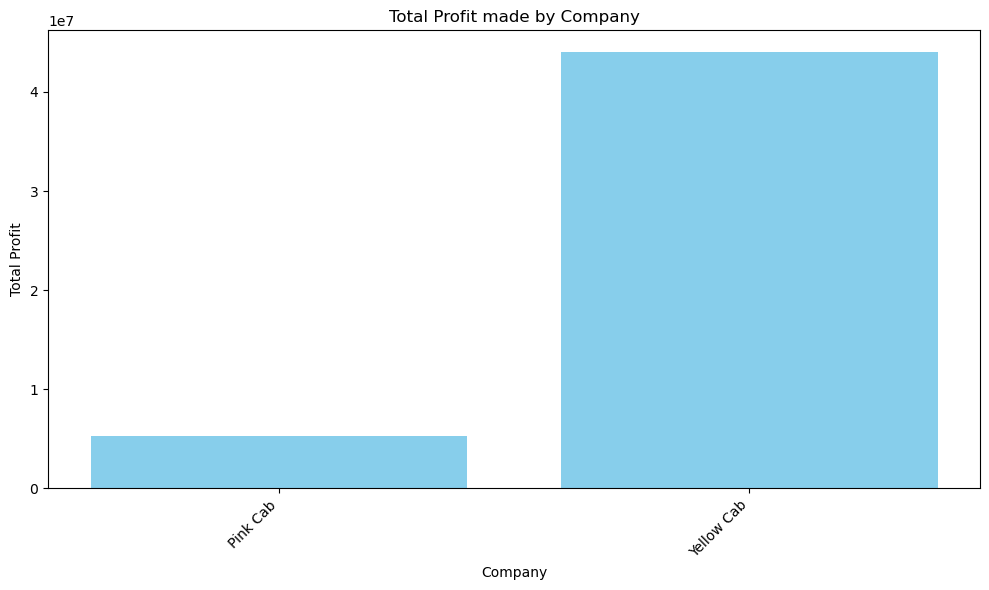

In [28]:
profit_df = pd.DataFrame.from_dict(total_profit, orient='index', columns=['Total Profit'])
profit_df.reset_index(inplace=True)
profit_df.rename(columns={'index':'Company'}, inplace=True)

pt.figure(figsize=(10,6))
pt.bar(profit_df['Company'], profit_df['Total Profit'], color='skyblue')
pt.title("Total Profit made by Company")
pt.xlabel("Company")f
pt.ylabel("Total Profit")
pt.xticks(rotation = 45, ha = 'right')
pt.tight_layout()
pt.show()

In [29]:
merged_df_h.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Age Group,Date Groups,profit per trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,28,25.0-33.0,2016,57.315
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,27,25.0-33.0,2016,23.666
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,53,42.0-65.0,2016,27.568
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,23,17.999-25.0,2016,25.798
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,33,25.0-33.0,2016,16.844


In [30]:

merged_df_h['Date Groups'] = merged_df_h['Date Groups'].astype(str)

company = merged_df_h['Company'].values
year = merged_df_h['Date Groups'].values
profit_per_trip = merged_df_h['profit per trip'].values

curyear = np.unique(year)
curcomp = np.unique(company)

profit_per_year = {}

# Loop through each unique year (Date Groups)
for cur_year in np.unique(year):
    # Filter data for the current year
    year_filter = (year == cur_year)

    # Initialize a dictionary for this year
    profit_per_year[cur_year] = {}

    # Loop through each unique company
    for cur_comp in np.unique(company):
        # Filter data for the current company within the current year
        comp_filter = (company == cur_comp)

        # Apply both filters (year and company)
        combined_filter = year_filter & comp_filter

        # Calculate the total profit for this company in this year
        total_profit = profit_per_trip[combined_filter].sum()

        # Store the result
        profit_per_year[cur_year][cur_comp] = total_profit

# Print the result
print(profit_per_year)

{'2016': {'Pink Cab': 1693009.84, 'Yellow Cab': 13817365.8968}, '2017': {'Pink Cab': 2034168.264, 'Yellow Cab': 16593796.6988}, '2018': {'Pink Cab': 1387070.326, 'Yellow Cab': 12532932.7856}, 'nan': {'Pink Cab': 193079.891, 'Yellow Cab': 1076277.7896}}


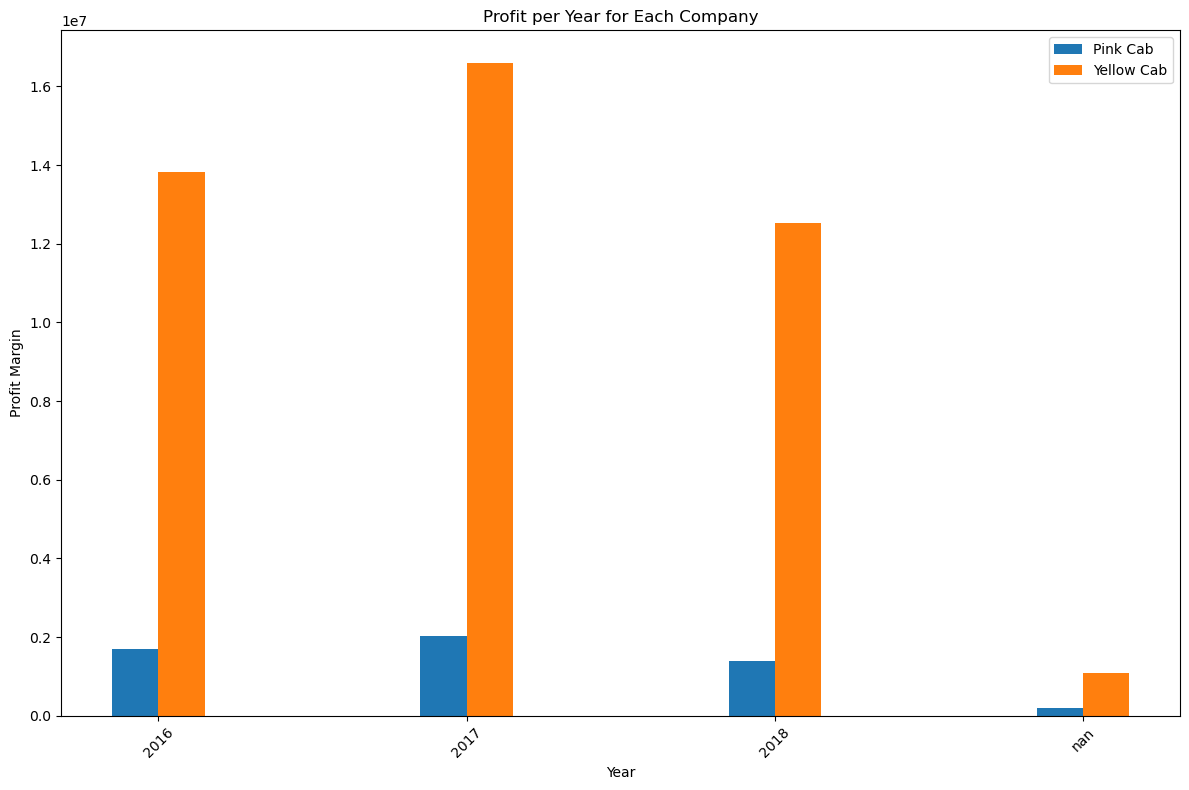

In [31]:
years = list(profit_per_year.keys())
companies = list(next(iter(profit_per_year.values())).keys())  # List of companies (assumes all companies have data for each year)

# Prepare the profit data for each company for each year
profit_data = {company: [profit_per_year[year].get(company, 0) for year in years] for company in companies}

# Plotting
fig, ax = pt.subplots(figsize=(12, 8))

# Create a bar plot for each company
width = 0.15  # the width of the bars
x = np.arange(len(years))  # the label locations

# Plot a bar for each company
for i, company in enumerate(companies):
    ax.bar(x + i * width, profit_data[company], width, label=company)

# Labeling and Formatting the Plot
ax.set_xlabel('Year')
ax.set_ylabel('Profit Margin')
ax.set_title('Profit per Year for Each Company')
ax.set_xticks(x + width * (len(companies) - 1) / 2)  # Adjust for multiple bars per year
ax.set_xticklabels(years)
ax.legend()

# Show the plot
pt.xticks(rotation=45)  # Rotate the x labels for better readability
pt.tight_layout()
pt.show()

In [32]:
merged_df_h.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Age Group,Date Groups,profit per trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,28,25.0-33.0,2016,57.315
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,27,25.0-33.0,2016,23.666
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,53,42.0-65.0,2016,27.568
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,23,17.999-25.0,2016,25.798
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,33,25.0-33.0,2016,16.844


In [33]:
merged_df_h.tail()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Age Group,Date Groups,profit per trip
359387,10440101,2018-01-09,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,24,17.999-25.0,2018,5.8800
359388,10440104,2018-01-05,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,32,25.0-33.0,2018,6.9020
359389,10440105,2018-01-06,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,56,42.0-65.0,2018,87.4200
359390,10440106,2018-01-06,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,32,25.0-33.0,2018,32.1420
359391,10440107,2018-01-03,Yellow Cab,WASHINGTON DC,12.76,191.58,177.6192,52917,20,17.999-25.0,2018,13.9608


In [37]:
year = merged_df_h['Date Groups'].values
customers = merged_df_h["Customer ID"].values
company = merged_df_h['Company'].values

unique_customer = np.unique(customer)
unique_companies = np.unique(company)
unique_year = np.unique(year)

user_growth_per_year = {}

for curyear in unique_year:
    # Filter rows for the current year
    year_filter = (year == curyear)
    
    user_growth_per_year[curyear] = {}
    
    for cur_comp in unique_companies:
        # Filter rows for the current company
        company_filter = (company == cur_comp)
        
        # Combine the filters
        combined_filter = (year_filter & company_filter)
        
        # Filter the dataframe and count unique customers
        filtered_data = merged_df_h[combined_filter]
        user_growth = filtered_data["Customer ID"].nunique()
        
        # Store the result
        user_growth_per_year[curyear][cur_comp] = user_growth

print(user_growth_per_year)

{'2016': {'Pink Cab': 16585, 'Yellow Cab': 25836}, '2017': {'Pink Cab': 18641, 'Yellow Cab': 27808}, '2018': {'Pink Cab': 17404, 'Yellow Cab': 26571}, 'nan': {'Pink Cab': 2397, 'Yellow Cab': 6295}}


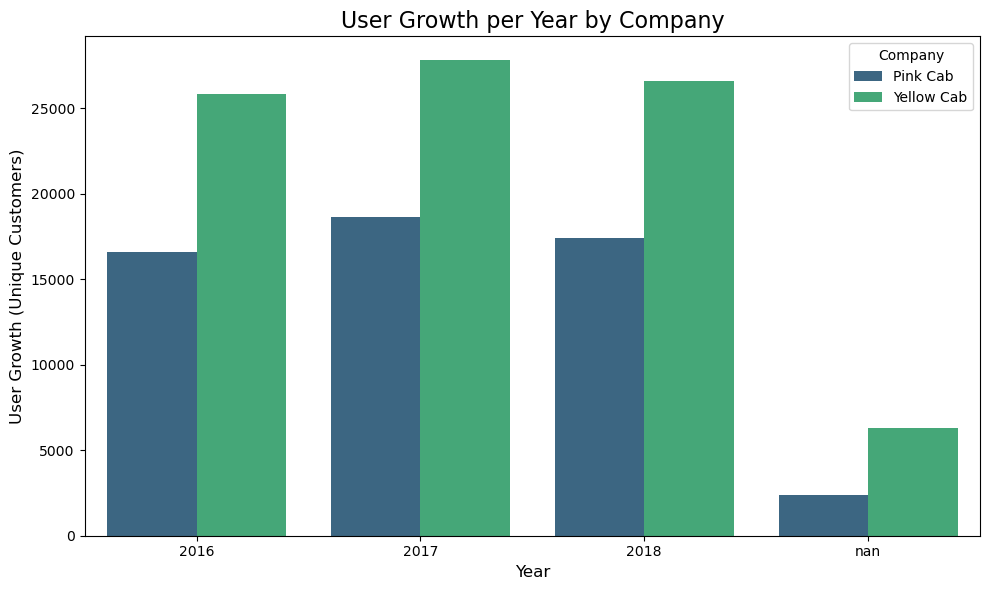

In [38]:
df_growth = pd.DataFrame(user_growth_per_year).T  # Transpose to have years as rows
df_growth.index.name = 'Year'  # Name the index (Year)
df_growth = df_growth.reset_index()  # Reset the index to make it a column

# Melt the DataFrame for easier plotting
df_melted = df_growth.melt(id_vars='Year', var_name='Company', value_name='User Growth')

# Plot the bar graph using Seaborn
pt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='Year', y='User Growth', hue='Company', palette='viridis')

# Add labels and title
pt.title('User Growth per Year by Company', fontsize=16)
pt.xlabel('Year', fontsize=12)
pt.ylabel('User Growth (Unique Customers)', fontsize=12)
pt.legend(title='Company')
pt.tight_layout()

In [77]:
customer_retention_for_5 = {}
customer_retention_for_10 = {}


grouped = merged_df_h.groupby(['Customer ID', 'Company']).size()

for (customer,company), count in grouped.items():

    if count >= 5:
        customer_retention_for_5[company] = customer_retention_for_5.get(company,0)+ 1

    if count >=10:
        customer_retention_for_10[company] = customer_retention_for_10.get(company,0)+ 1

customer_retention_for_5 = {k:[v] for k,v in customer_retention_for_5.items()}
customer_retention_for_10 = {k:[v] for k,v in customer_retention_for_10.items()}

print(customer_retention_for_5)
print(customer_retention_for_10)



{'Yellow Cab': [15780], 'Pink Cab': [5515]}
{'Yellow Cab': [10715], 'Pink Cab': [492]}


      Company  retention
0  Yellow Cab      15780
1    Pink Cab       5515


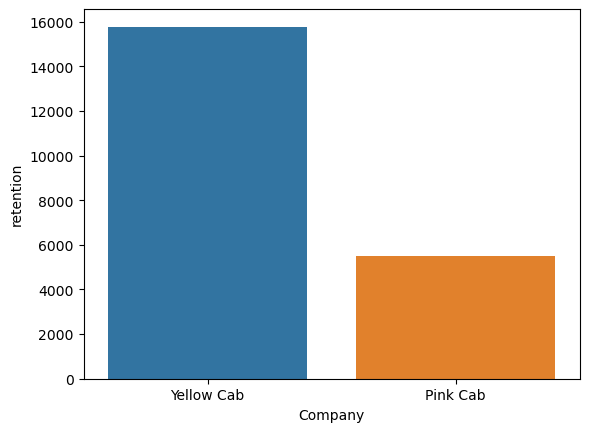

In [93]:

retention_5_df = pd.DataFrame.from_dict(customer_retention_for_5).T
retention_5_df.index.name = 'Company'
retention_5_df = retention_5_df.reset_index()
retention_5_df = retention_5_df.set_axis(['Company', 'retention',], axis=1)



print(retention_5_df)

sns.barplot(x="Company", y="retention", data=retention_5_df)
pt.show()

      Company  retention
0  Yellow Cab      10715
1    Pink Cab        492


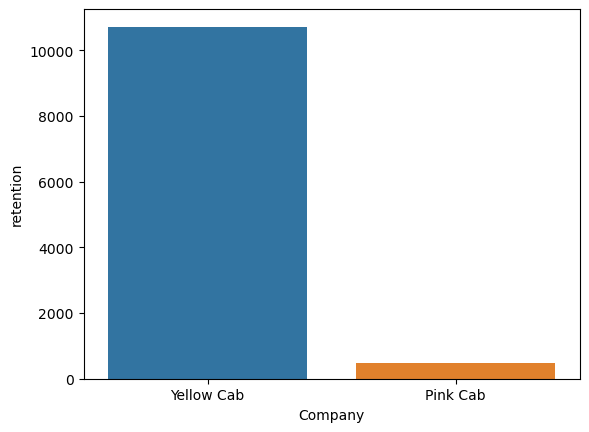

In [94]:
retention_10_df = pd.DataFrame.from_dict(customer_retention_for_10).T
retention_10_df.index.name = 'Company'
retention_10_df = retention_10_df.reset_index()
retention_10_df = retention_10_df.set_axis(['Company', 'retention',], axis=1)



print(retention_10_df)

sns.barplot(x="Company", y="retention", data=retention_10_df)
pt.show()